## Polytope Extremes-DT Feature Extraction Polygon example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.
In this example we will request a H3 cell of data from polytope feature extraction.


Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install H3
* pip install cf-units         (Optional for unit conversion in maps)

In [ ]:
import h3

boundary = h3.cell_to_boundary('82194ffffffffff')

((52.517133978422294, 2.1013139839474526),
 (52.1416808182628, -0.21913743445924622),
 (50.60191112048409, -0.6310947579755037),
 (49.47027919866874, 1.188509553443467),
 (49.85377035058955, 3.384771510058863),
 (51.36037619595015, 3.881133559670629))

In [ ]:
import earthkit.data
import earthkit.regrid

request = {
    "dataset": "extremes-dt",
    "class": "d1",
    "stream": "oper",
    "type": "fc",
    "date": -10,
    "time": "0000",
    "levtype": "sfc",
    "expver": "0001",
    "param": "165/167",
    "step": "1",
    "feature": {
        "type": "polygon",
        "shape": boundary,
        "axes" : ["latitude", "longitude"],
    },
}

#data is an earthkit streaming object but with stream=False will download data immediately 
ds = earthkit.data.from_source("polytope", "destination-earth", request, stream=False, address='polytope.lumi.apps.dte.destination-earth.eu')


In [ ]:
ds._json()

In [6]:
# Convert data to xarray
ds.to_xarray()

<xarray.Dataset> Size: 166kB
Dimensions:    (datetimes: 1, number: 1, steps: 1, points: 3450)
Coordinates:
  * datetimes  (datetimes) <U20 80B '2025-06-08T00:00:00Z'
  * number     (number) int64 8B 0
  * steps      (steps) int64 8B 1
  * points     (points) int64 28kB 0 1 2 3 4 5 ... 3444 3445 3446 3447 3448 3449
    latitude   (points) float64 28kB 49.51 49.51 49.51 49.51 ... 52.47 52.5 52.5
    longitude  (points) float64 28kB 1.168 1.246 1.324 ... 2.099 2.017 2.101
    levelist   (points) float64 28kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Data variables:
    10u        (datetimes, number, steps, points) float64 28kB 5.556 ... 7.924
    2t         (datetimes, number, steps, points) float64 28kB 284.3 ... 285.9
Attributes:
    class:          d1
    dataset:        extremes-dt
    Forecast date:  2025-06-08T00:00:00Z
    expver:         0001
    levtype:        sfc
    step:           1
    stream:         oper
    type:           fc
    number:         0
    date:           2025-06-08T00:00:00Z

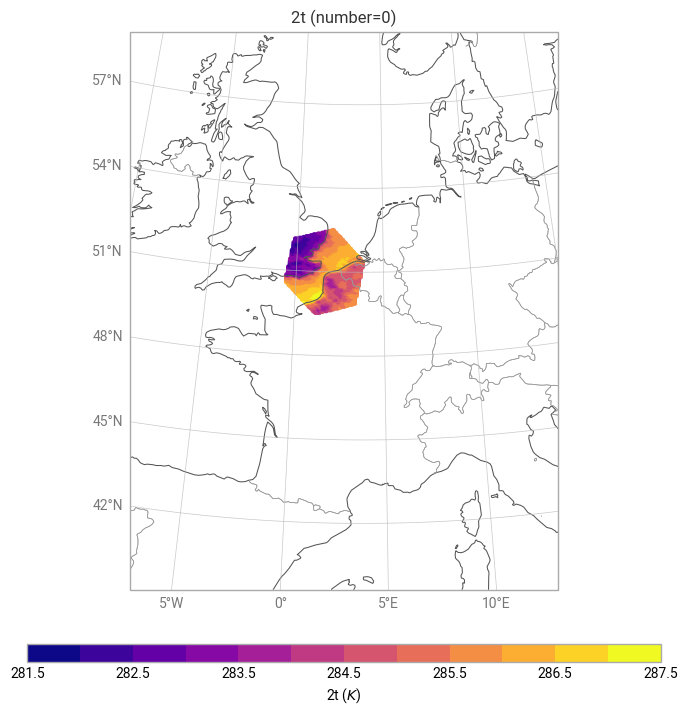

In [11]:
da = ds.to_xarray()
import earthkit.plots
chart = earthkit.plots.Map(domain=["United Kingdom", "France"])
chart.point_cloud(da['2t'], x="longitude", y="latitude")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()